<a href="https://colab.research.google.com/github/falsefoobar/CS381/blob/main/R_Leung_Project3_assn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Assignment

# 1985 Auto Imports Database

Description

The data set has
(a) the specification of an auto in terms of various characteristics,
(b) its assigned insurance risk rating,
(c) its normalized losses in use as compared to other cars

"Automobile Data Set." *UCI Machine Learning Repository*, University of California, Irvine, https://archive.ics.uci.edu/dataset/10/automobile


# Importing Data

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://github.com/falsefoobar/CS381/blob/main/imports-85.data?raw=True"
df = pd.read_csv(url, header=None)

df.columns = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]

df.shape


(205, 26)

# What attribute do our data have?

We have a data set with 26 attibutes and 205 rows of data points.

1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     
                               alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  
4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

"Automobile Data Set." *UCI Machine Learning Repository*, University of California, Irvine, https://archive.ics.uci.edu/dataset/10/automobile

# Checking for Missing Data

In [245]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We have missing data

In [188]:
(df == '?').sum()[ (df == '?').sum() > 0 ]

,0
normalized-losses,41
num-of-doors,2
bore,4
stroke,4
horsepower,2
peak-rpm,2
price,4


We have missing data in normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price

In order to not introduce bias in our model I'm going to back fill the colomn of 'num-of-doors'.

As for "price", "engine-size", "horsepower", "bore", "peak-rpm", I'm going to use K-Nearest Neighbors to fill the empty data points. This is because 'prices' is heavily influenced by multiple attributes and I would like to preserve those relationships with the other attributes. I will do the same for the other listed attirbutes as well.

In [201]:
from sklearn.impute import KNNImputer

columns_for_price_imputation = [
    "price", "engine-size", "horsepower", "bore", "peak-rpm"
]

# convert the cols to numeric
df_price_knn = df[columns_for_price_imputation].apply(pd.to_numeric, errors='coerce')

# apply knn
imputer = KNNImputer(n_neighbors=5)
df_price_imputed = pd.DataFrame(imputer.fit_transform(df_price_knn), columns=columns_for_price_imputation)

# replace all the col in the imputed cols into the df
for col in columns_for_price_imputation:
    df[col] = df_price_imputed[col]


In [206]:
# back fill the '?' data points in 'num-of-doors'
df["num-of-doors"].replace('?', np.nan, inplace=True)
df["num-of-doors"] = df["num-of-doors"].bfill()

print(df.loc[[27, 63]])

    symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
27          1              148.0  dodge       gas      turbo         four   
63          0              115.0  mazda    diesel        std         four   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
27      sedan          fwd           front        93.7  ...         98.0   
63      sedan          fwd           front        98.8  ...        122.0   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
27         mpfi  3.03    3.39               7.6      102.0    5500.0       24   
63          idi  3.39    3.39              22.7       64.0    4650.0       36   

    highway-mpg    price  
27           30   8558.0  
63           42  10795.0  

[2 rows x 26 columns]


<ipython-input-206-25524523>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace('?', np.nan, inplace=True)


In [207]:
# check if  replaced
df[["engine-size", 'price', "horsepower", "bore", "stroke", "num-of-doors", "normalized-losses"]].isnull().sum()

,0
engine-size,0
price,0
horsepower,0
bore,0
stroke,0
num-of-doors,0
normalized-losses,0


In [208]:
(df == '?').sum()[ (df == '?').sum() > 0 ]

,0


In [103]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,120.711443,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.257562,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,32.111623,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316082,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Check to see the data types in check of the colomns.

In [83]:
df["price"] = pd.to_numeric(df["price"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

# City MPG vs Car Price
I'm exploring the data to check if there is a correlation between the mpg of a car and the price of a car. In modern times, mpg is a value that is advertised by car companies and marketed as a good feature for cars. From this data we can see that the cars with with high mpg have a price range between 5151 to 10795. I do not think there are any correlation between the price and a high mpg. I do see that a all of high mpg cars are FWD cars.

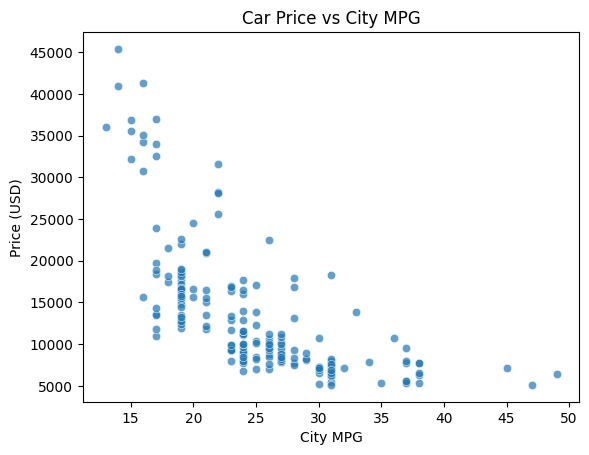

In [97]:
sns.scatterplot(data=df, x="city-mpg", y="price", alpha=0.7)
plt.title("Car Price vs City MPG")
plt.xlabel("City MPG")
plt.ylabel("Price (USD)")
plt.show()

The majority of cars are  distrubuted between 20 to 35 mpg. There are some outliters with 3 cars in the 45 to 50 mpg range. And a cluster of cars under the 18 mpg range.

# Observing cars over 35MPG

In [90]:
indices = df.index[df["city-mpg"] > 35].tolist()
print([df.loc[indices]])


[     symboling  normalized-losses        make fuel-type aspiration  \
18           2              121.0   chevrolet       gas        std   
19           1               98.0   chevrolet       gas        std   
20           0               81.0   chevrolet       gas        std   
21           1              118.0       dodge       gas        std   
30           2              137.0       honda       gas        std   
32           1              101.0       honda       gas        std   
63           0              115.0       mazda    diesel        std   
76           2              161.0  mitsubishi       gas        std   
90           1              128.0      nissan    diesel        std   
118          1              119.0    plymouth       gas        std   
159          0               91.0      toyota    diesel        std   
160          0               91.0      toyota       gas        std   
182          2              122.0  volkswagen    diesel        std   
184          2     

#Observe the clutter of cars with low mpg


In [149]:
indices = df.index[df["city-mpg"] <= 18].tolist()
print([df.loc[indices]])

[     symboling  normalized-losses           make fuel-type aspiration  \
4            2              164.0           audi       gas        std   
8            1              158.0           audi       gas      turbo   
15           0              115.0            bmw       gas        std   
16           0              115.0            bmw       gas        std   
17           0              115.0            bmw       gas        std   
47           0              145.0         jaguar       gas        std   
48           0              115.0         jaguar       gas        std   
49           0              115.0         jaguar       gas        std   
55           3              150.0          mazda       gas        std   
56           3              150.0          mazda       gas        std   
57           3              150.0          mazda       gas        std   
58           3              150.0          mazda       gas        std   
71          -1              115.0  mercedes-benz  

From my observation of the data of the cars with lowest  MPG, almost all the car's drive wheel are RWD despite having different makers.

In [151]:
low_mpg_cars = df[df["city-mpg"] <= 18]
# mean of low mpg cars
mean_values = low_mpg_cars[["engine-size", "horsepower", "price"]].mean()
# mean of all the cars
mean_all = df[["engine-size", "horsepower", "price"]].mean()
print("All cars:")
print(mean_all)
print("Low mpg cars:")
print(mean_values)

All cars:
engine-size      126.875622
horsepower       103.396985
price          13207.129353
dtype: float64
Low mpg cars:
engine-size      184.538462
horsepower       163.692308
price          26536.384615
dtype: float64


The mean values of cars with low mpg have larger engines, higher horsepower, and higher price tag.

Moving on, I want to see if there is a correlation between car price and normalized losses.

In [239]:
df["normalized-losses"].describe()

,normalized-losses
count,205.000000
mean,120.600000
std,31.805105
min,65.000000
25%,101.000000
50%,115.000000
75%,137.000000
max,256.000000


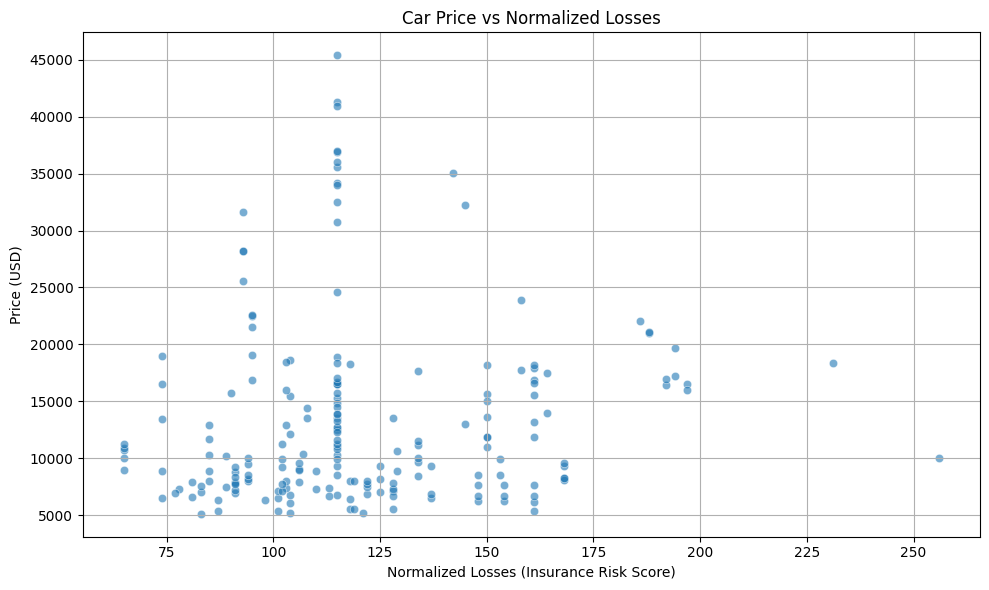

In [99]:
plot_df = df[["normalized-losses", "price"]]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="normalized-losses", y="price", alpha=0.6)
plt.title("Car Price vs Normalized Losses")
plt.xlabel("Normalized Losses (Insurance Risk Score)")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

From this graph, I can't tell if the prices necessarily have an effect on the normalize losses.

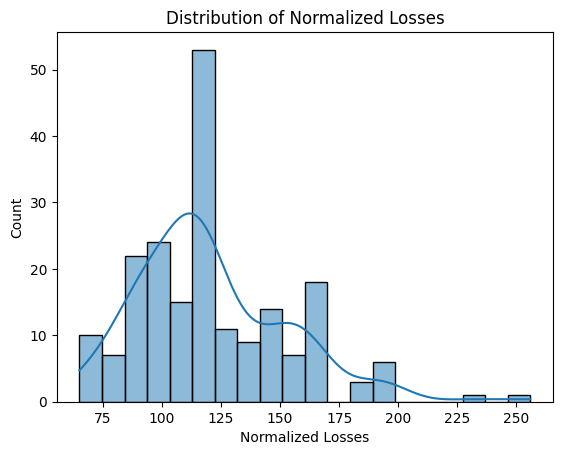

In [106]:
sns.histplot(df["normalized-losses"], bins=20, kde=True)
plt.title("Distribution of Normalized Losses")
plt.xlabel("Normalized Losses")
plt.ylabel("Count")
plt.show()

<ipython-input-105-2590597366>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="make", y="price", palette="Blues_d")


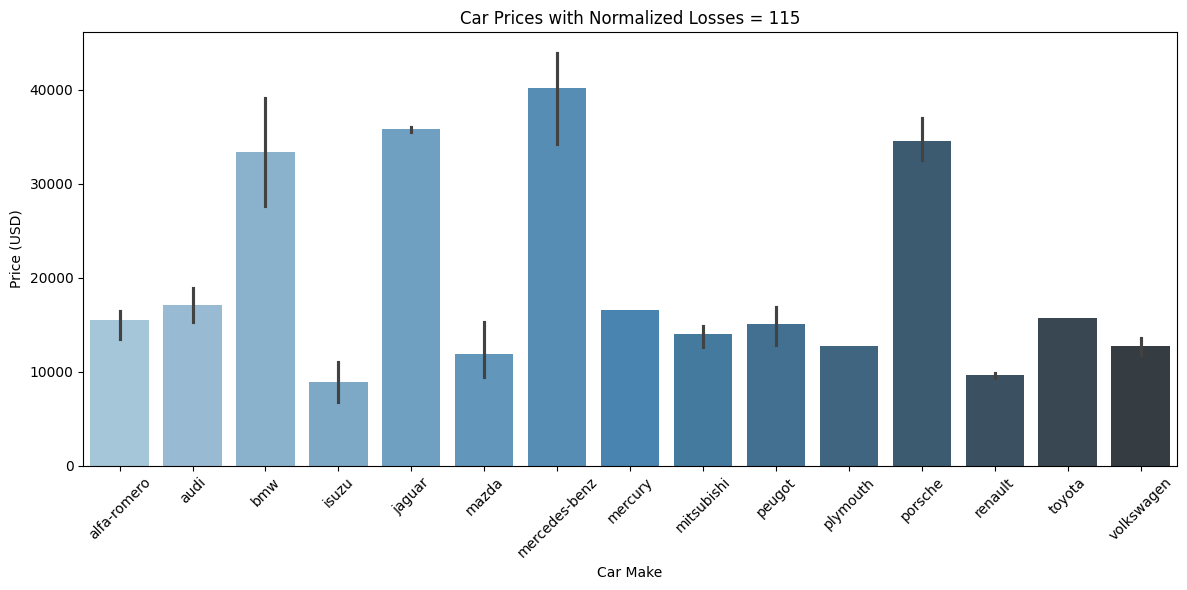

In [105]:
filtered_df = df[df["normalized-losses"] == 115]

# price vs make (or another attribute like body-style)
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df, x="make", y="price", palette="Blues_d")
plt.title("Car Prices with Normalized Losses = 115")
plt.xlabel("Car Make")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have all maker of cars in the 115 normalize loss range.

<ipython-input-112-3328653461>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x="make", y="price", palette="Blues_d")


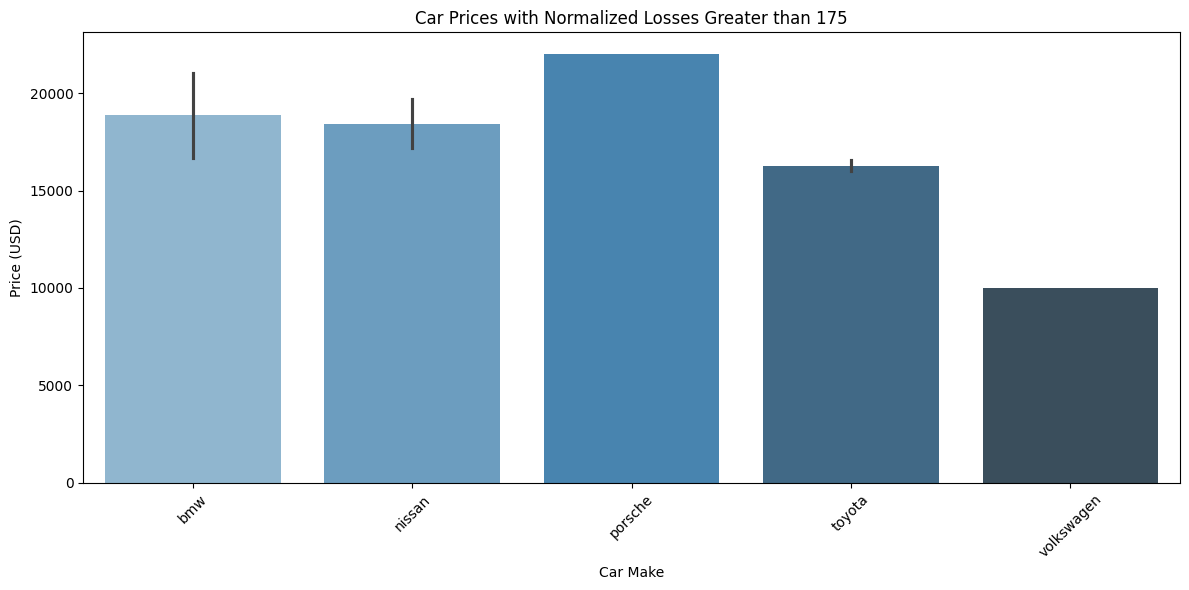

In [112]:
filtered_df = df[df["normalized-losses"] > 175]

# price vs make (or another attribute like body-style)
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df, x="make", y="price", palette="Blues_d")
plt.title("Car Prices with Normalized Losses Greater than 175")
plt.xlabel("Car Make")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
print(filtered_df)


     symboling  normalized-losses        make fuel-type aspiration  \
10           2              192.0         bmw       gas        std   
11           0              192.0         bmw       gas        std   
12           0              188.0         bmw       gas        std   
13           0              188.0         bmw       gas        std   
104          3              194.0      nissan       gas        std   
105          3              194.0      nissan       gas      turbo   
106          1              231.0      nissan       gas        std   
125          3              186.0     porsche       gas        std   
178          3              197.0      toyota       gas        std   
179          3              197.0      toyota       gas        std   
190          3              256.0  volkswagen       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
10           two      sedan          rwd           front       101.2  ...   
11   

I wanted to take a look at the outliers where the normalized loss score is over 175. I found that all but one of the cars  were all RWD. From an earlier obervation, almost all the cars with low mpg were RWD cars.



---
I want to see if the drive wheel of cars have an effect on the normailzed loss score of cars.


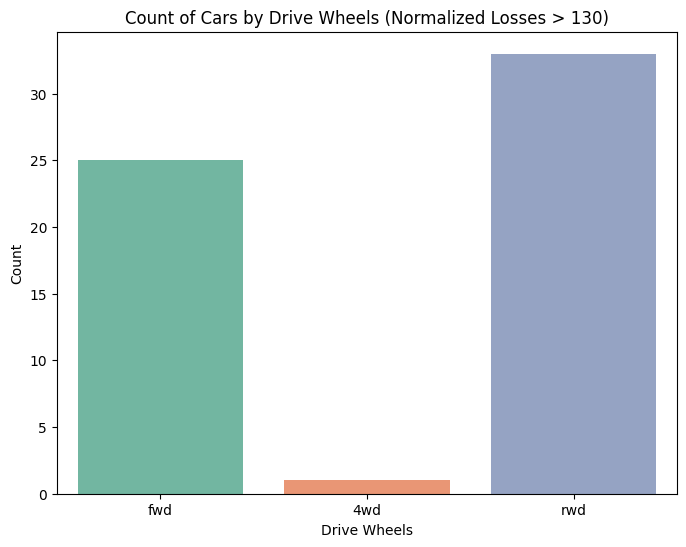

In [156]:
filtered_df = df[df["normalized-losses"] > 130]

# Plot count of cars by drive-wheels category
plt.figure(figsize=(8,6))
sns.countplot(data=filtered_df, x="drive-wheels", palette="Set2")
plt.title("Count of Cars by Drive Wheels (Normalized Losses > 130)")
plt.xlabel("Drive Wheels")
plt.ylabel("Count")
plt.show()

We can see here that there is a 10 count difference in the count between RWD and FWD car.

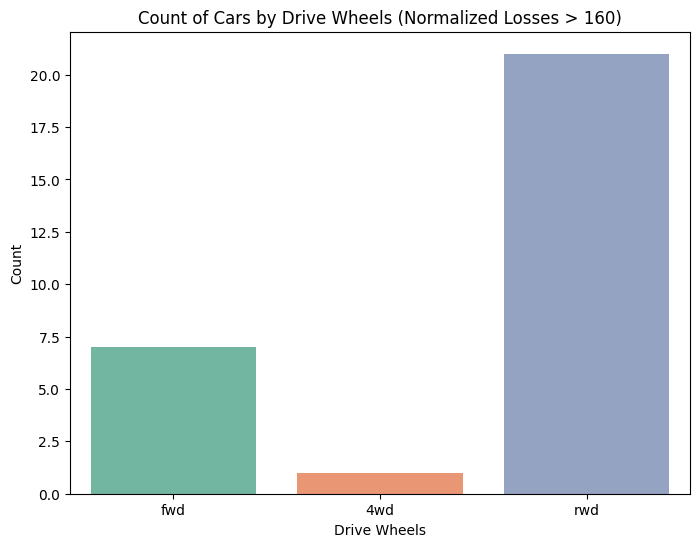

In [159]:
filtered_df = df[df["normalized-losses"] > 160]

# Plot count of cars by drive-wheels category
plt.figure(figsize=(8,6))
sns.countplot(data=filtered_df, x="drive-wheels", palette="Set2")
plt.title("Count of Cars by Drive Wheels (Normalized Losses > 160)")
plt.xlabel("Drive Wheels")
plt.ylabel("Count")
plt.show()

The difference increases as the normalized loss score increases.

In [161]:
print(filtered_df[["make", "drive-wheels","normalized-losses", "price"]])

           make drive-wheels  normalized-losses  price
3          audi          fwd              164.0  13950
4          audi          4wd              164.0  17450
10          bmw          rwd              192.0  16430
11          bmw          rwd              192.0  16925
12          bmw          rwd              188.0  20970
13          bmw          rwd              188.0  21105
76   mitsubishi          fwd              161.0   5389
77   mitsubishi          fwd              161.0   6189
78   mitsubishi          fwd              161.0   6669
79   mitsubishi          fwd              161.0   7689
98       nissan          fwd              168.0   8249
104      nissan          rwd              194.0  17199
105      nissan          rwd              194.0  19699
106      nissan          rwd              231.0  18399
107      peugot          rwd              161.0  11900
108      peugot          rwd              161.0  13200
111      peugot          rwd              161.0  15580
112      p

There are some outliers. For some reason mitsubishi FWD cars normalized losses scores were all 161, despite being relatively lower priced. And then we have a volkdwagon car that has a score of 256. This score being greater than the rest of the cars.

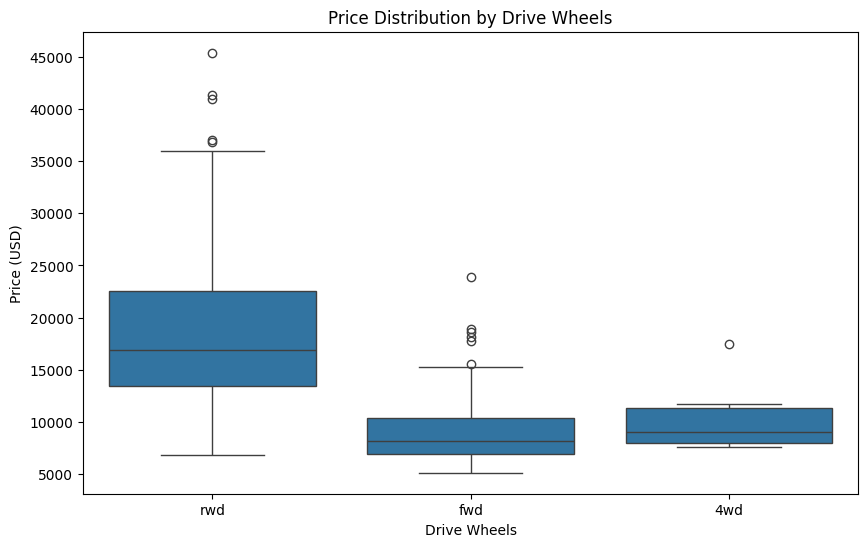

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="drive-wheels", y="price")
plt.title("Price Distribution by Drive Wheels")
plt.xlabel("Drive Wheels")
plt.ylabel("Price (USD)")
plt.show()

From my observation of the data, the average of price of a RWD is greater than that of a FWD AND AWD car. AWD cars prices are higher than FWD cars, but not by a significant amount. The most expensive cars are exclusively made with RWD and the normalized loss score for those cars are the highest.

#Is there a relationship between car price and the body type of a car?


<ipython-input-165-3362812568>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="body-style", y="price", palette="Set3")


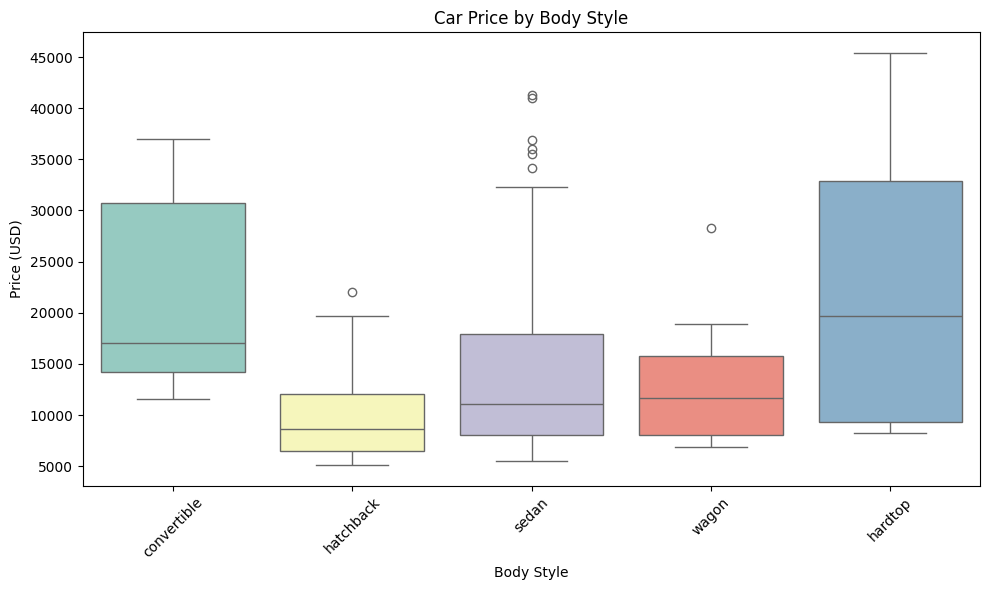

In [165]:
df_clean = df.dropna(subset=["price", "body-style"])


plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="body-style", y="price", palette="Set3")

plt.title("Car Price by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


On average the hardtop and convertible cars cost more than the rest of the other body styles.
Overall, hatchback cars have the lowest price point. There are sedan car types that do reach the lower end price point, but most do not.

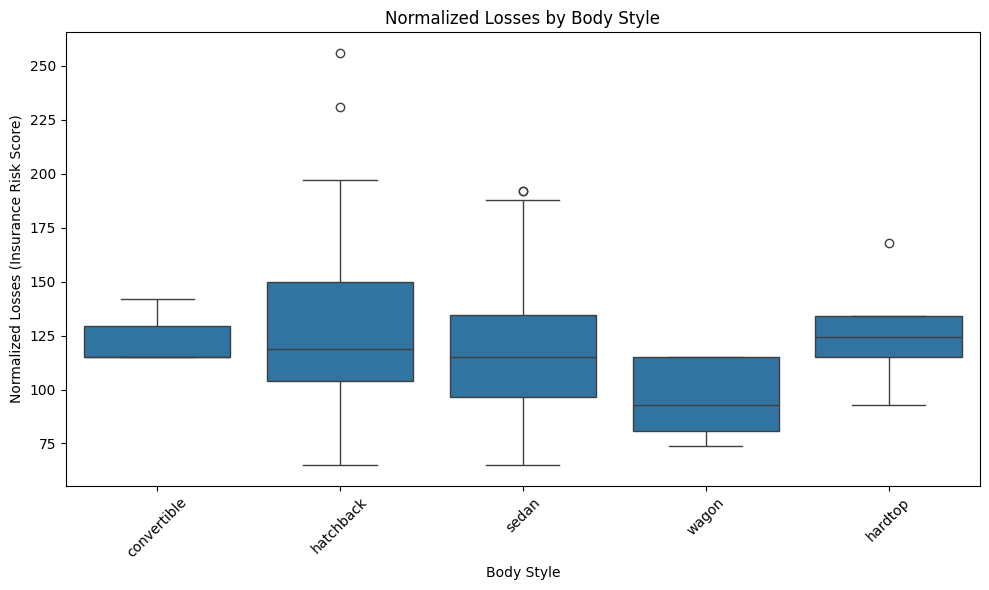

In [167]:
df_clean = df.dropna(subset=["normalized-losses", "body-style"])

# Create the box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="body-style", y="normalized-losses")

plt.title("Normalized Losses by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Normalized Losses (Insurance Risk Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hatchback and sedans appear to have the cars that touches the upper range of the losses score. The volkswagon hatchback seems to the outlier for this dataset. From my observation insurance companies favor wagons and some models of hatchbacks and sedans.



---



# Feature Engineering



Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.



From the data set, I've observed that features: prices, mpg, normalized loss scores, engine size, and horse power should  be scaled. Price have a very long range, and should be scaled. Curb weight and city mpg should be scaled because the values vary and may have a correlation. Horse power and normalized losses varies a lot so I think those should be sacled as well.

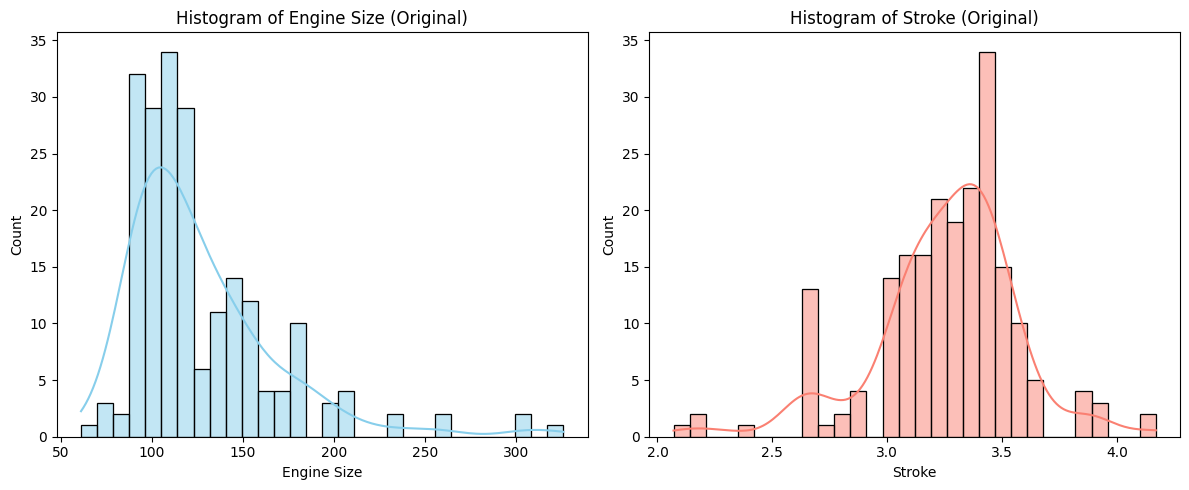

In [220]:
df_plot = df[["engine-size", "stroke"]].dropna()

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for engine-size
plt.subplot(1, 2, 1)
sns.histplot(df_plot["engine-size"], kde=True, color="skyblue", bins=30)
plt.title("Histogram of Engine Size (Original)")
plt.xlabel("Engine Size")
plt.ylabel("Count")

# Histogram for stroke
plt.subplot(1, 2, 2)
sns.histplot(df_plot["stroke"], kde=True, color="salmon", bins=30)
plt.title("Histogram of Stroke (Original)")
plt.xlabel("Stroke")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: xlabel='engine-size'>

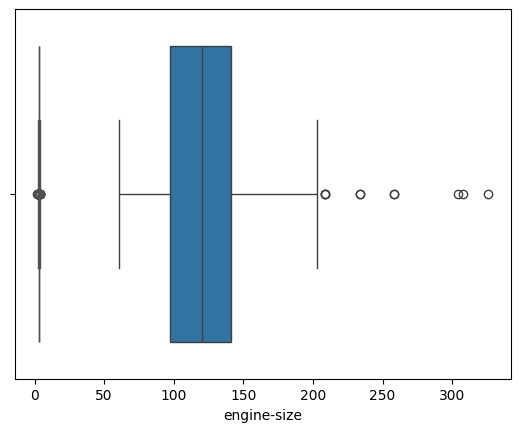

In [229]:
sns.boxplot(x=df["engine-size"])

<Axes: xlabel='stroke'>

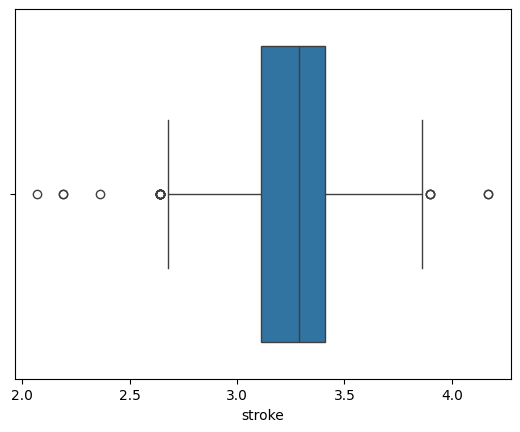

In [230]:
sns.boxplot(x=df["stroke"])


In [219]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# features to scale
features_to_scale = [
    "normalized-losses",
    "curb-weight",
    "engine-size",
    "horsepower",
    "city-mpg",
    "price",
    "stroke"
]

df_selected = df[features_to_scale].copy()

# Step 3: apply standard scaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df_selected)

scaled_df = pd.DataFrame(scaled_df, columns = df_selected.columns)

# Step 5: Show results
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   curb-weight        205 non-null    float64
 2   engine-size        205 non-null    float64
 3   horsepower         205 non-null    float64
 4   city-mpg           205 non-null    float64
 5   price              205 non-null    float64
 6   stroke             205 non-null    float64
dtypes: float64(7)
memory usage: 11.3 KB


Consider the engine-size and stroke variables: Describe the specific feature scaling method
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables. Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts.
Compare your newly created plots against the plots you created for the original content of the
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If
your feature scaling efforts did not improve the distribution of the data, explain why you believe your
efforts were not effective.

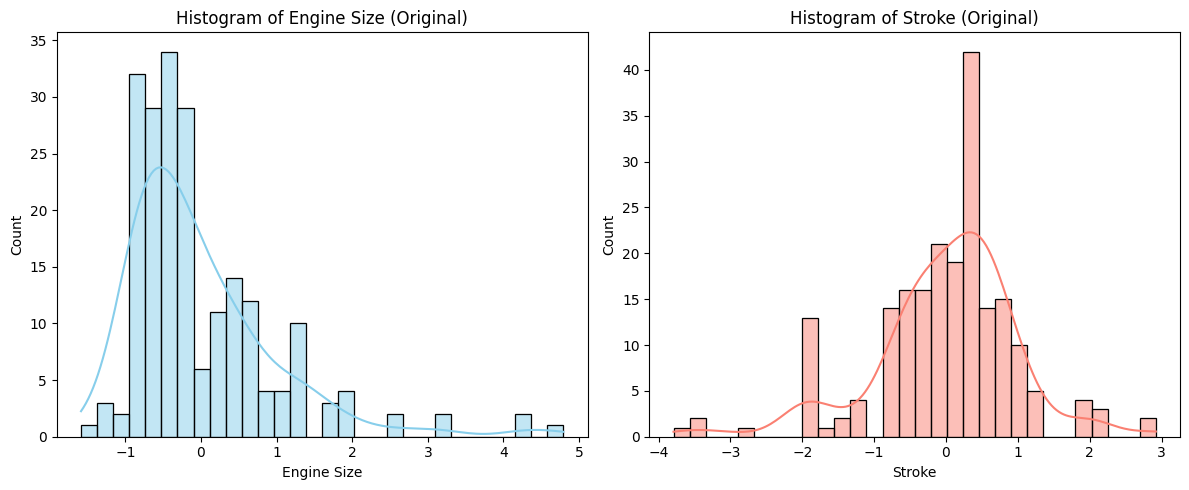

In [238]:
df_plot = scaled_df[["engine-size", "stroke"]].dropna()

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for engine-size
plt.subplot(1, 2, 1)
sns.histplot(df_plot["engine-size"], kde=True, color="skyblue", bins=30)
plt.title("Histogram of Engine Size (Original)")
plt.xlabel("Engine Size")
plt.ylabel("Count")

# Histogram for stroke
plt.subplot(1, 2, 2)
sns.histplot(df_plot["stroke"], kde=True, color="salmon", bins=30)
plt.title("Histogram of Stroke (Original)")
plt.xlabel("Stroke")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: xlabel='engine-size'>

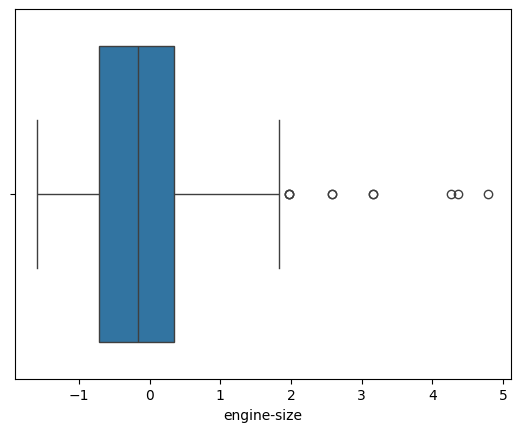

In [232]:
sns.boxplot(x=scaled_df["engine-size"])

<Axes: xlabel='stroke'>

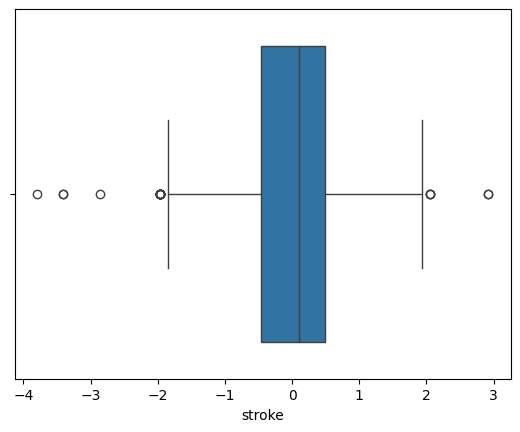

In [233]:
sns.boxplot(x=scaled_df["stroke"])


The scaling did not improve the distribution. The scaling may have changed the scale and range of the data but the shape of the distrubtuion stayed the same. The outliers that was on the original data frame, stayed on the scaled data frame.



---




Consider the symboling, make, and engine-type variables:

    A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,categorical/nominal, or categorical/ordinal

    B) For each variable, describe the methodology you would employ for purposes of preparing its datavalues for use within a machine learning algorithm.
    
    C) Using your Python skills, apply your prescribed data preparation methodologies to the threevariables. Be sure to show a sample of your results within your Notebook

    A) symboling if it means safety rating, is ordinal. Make and engine-type are categorical.
    B) I would use label encoding for the symboling. And one hot encoding for make and engine-type.

# Encoding symboling, Make, and Engine Type

In [246]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['symboling_encoded'] = label_encoder.fit_transform(df['symboling'])
df_encoded = pd.get_dummies(df, columns=['make', 'engine-type'], drop_first=True)

print(df_encoded.head())

   symboling  normalized-losses fuel-type aspiration num-of-doors  \
0          3              115.0       gas        std          two   
1          3              115.0       gas        std          two   
2          1              115.0       gas        std          two   
3          2              164.0       gas        std         four   
4          2              164.0       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  ...  \
0  convertible          rwd           front        88.6   168.8  ...   
1  convertible          rwd           front        88.6   168.8  ...   
2    hatchback          rwd           front        94.5   171.2  ...   
3        sedan          fwd           front        99.8   176.6  ...   
4        sedan          4wd           front        99.4   176.6  ...   

   make_subaru  make_toyota  make_volkswagen make_volvo  engine-type_dohcv  \
0        False        False            False      False              False

<Axes: xlabel='symboling_encoded', ylabel='count'>

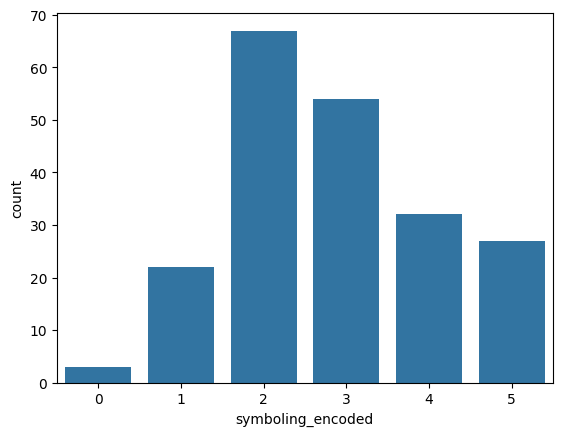

In [247]:
sns.countplot(x='symboling_encoded', data=df)


I do not want to use this encoding on symboling because it changes the numbers that can confuse the interpretation.

In [266]:
#df['symboling'] = original_df['symboling']


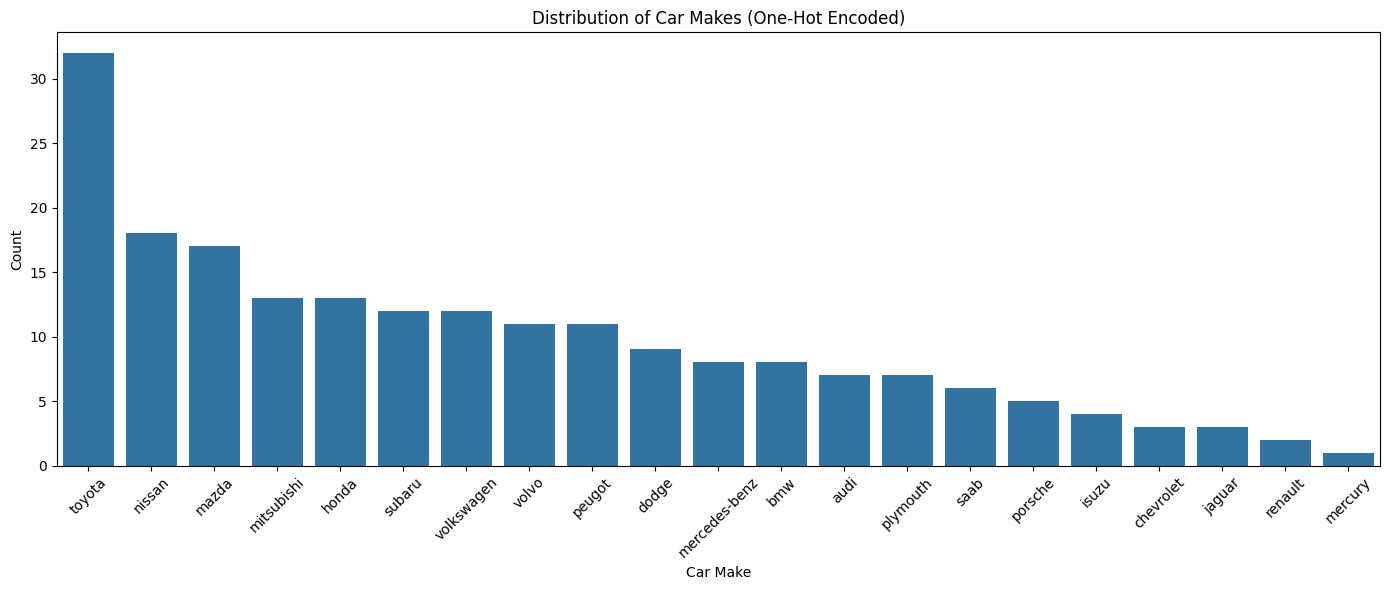

In [257]:
# Step 1: Extract only the make columns (one-hot encoded ones start with 'make_')
make_columns = [col for col in df_encoded.columns if col.startswith('make_')]

# Step 2: Melt into long format
df_long_make = df_encoded[make_columns].copy()
df_long_make = df_long_make.melt(var_name='Make', value_name='Value')

# Step 3: Filter only rows where the one-hot encoded value is 1
df_long_make = df_long_make[df_long_make['Value'] == 1]

# Step 4: Clean up column values (remove 'make_' prefix)
df_long_make['Make'] = df_long_make['Make'].str.replace('make_', '')

# Step 5: Plot using seaborn
plt.figure(figsize=(14, 6))
sns.countplot(x='Make', data=df_long_make, order=df_long_make['Make'].value_counts().index)
plt.title('Distribution of Car Makes (One-Hot Encoded)')
plt.xticks(rotation=45)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

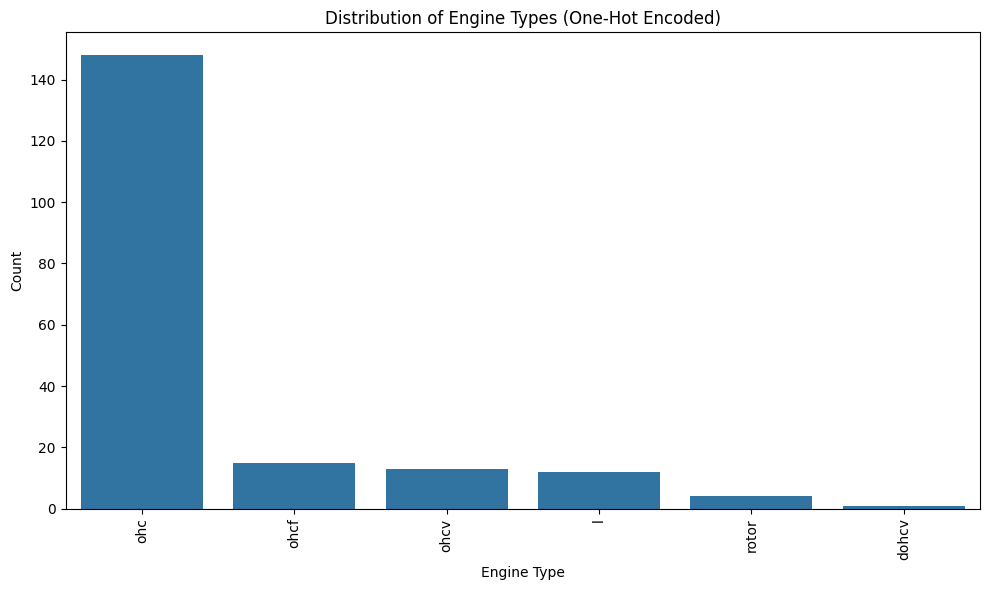

In [267]:
engine_type_columns = [col for col in df_encoded.columns if col.startswith("engine-type_")]

engine_type_counts = df_encoded[engine_type_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=engine_type_counts.index.str.replace("engine-type_", "").str.replace("_", " "),
    y=engine_type_counts.values
)
plt.title("Distribution of Engine Types (One-Hot Encoded)")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Reduce the dimensionality  wheel-base, length, width, height, curb-weight, engine-size, compression ratio, horsepower, peak-rpm, and city-mpg variables

PC1 explains 54.64% of the variance
PC2 explains 21.54% of the variance
PC3 explains 9.19% of the variance
PC4 explains 5.84% of the variance
PC5 explains 3.08% of the variance
PC6 explains 2.29% of the variance
PC7 explains 1.34% of the variance
PC8 explains 0.83% of the variance
PC9 explains 0.76% of the variance
PC10 explains 0.51% of the variance

Cumulative variance explained by first 4 PCs: 91.20%


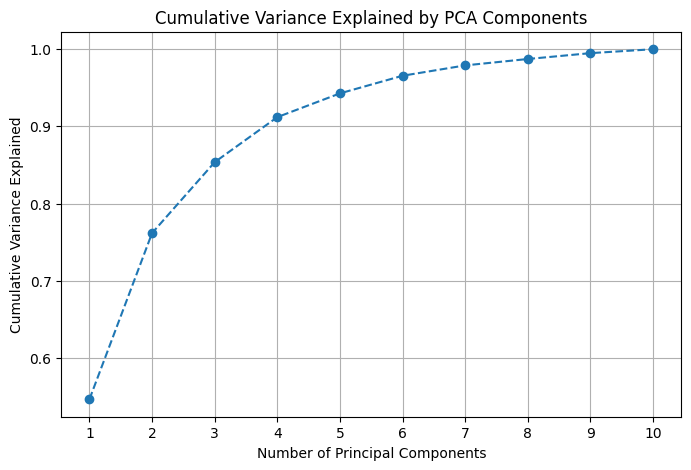

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# List of variables to use
features = [
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-size", "compression-ratio", "horsepower", "peak-rpm", "city-mpg"
]

# Select these columns and drop rows with missing data (if any)
df_selected = df[features].dropna()

# Step 1: Standardize the features (important before PCA)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected)

# Step 2: Apply PCA
pca = PCA(n_components=len(features))
pca_result = pca.fit_transform(scaled_features)

# Step 3: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print variance explained by each PC
for i, var_exp in enumerate(explained_variance, 1):
    print(f"PC{i} explains {var_exp:.2%} of the variance")

print(f"\nCumulative variance explained by first 4 PCs: {cumulative_variance[3]:.2%}")

# Step 4: Plot cumulative variance explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(features)+1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.xticks(range(1, len(features)+1))
plt.grid(True)
plt.show()

Since we are using 10 attributes, PCA will generate 10 orthogonal features. If we reduce the 10 dimensions of data to the 4 PCA, we will retain 91.20% of the data.  

# References

https://archive.ics.uci.edu/dataset/10/automobile

